In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from wordcloud import WordCloud
from nltk.probability import FreqDist

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

In [9]:
## To view the full review
pd.set_option('display.max_colwidth', -1)

C:\Users\Subhadri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


### Reading the data

In [10]:
redmi_note_5_pro = pd.read_csv('C:/Users/Subhadri/Desktop/Data Science/Term 2/Project/Redmi_Note_5_Pro.csv')
redmi_note_5_pro.head()

Unnamed: 0      Review Header  \
0  0           Must buy!           
1  1           Fabulous!           
2  2           Worth every penny   
3  3           Terrific purchase   
4  4           Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup i

### EDA

In [11]:
# Dropping the 'Unnamed: 0' column

redmi_note_5_pro = redmi_note_5_pro.drop('Unnamed: 0', axis = 1)
redmi_note_5_pro.head()

Review Header  \
0  Must buy!           
1  Fabulous!           
2  Worth every penny   
3  Terrific purchase   
4  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very q

In [12]:
redmi_note_5_pro.shape

(19870, 3)

In [13]:
redmi_note_5_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19870 entries, 0 to 19869
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review Header  19870 non-null  object 
 1   Reviews        19870 non-null  object 
 2   Ratings        19870 non-null  float64
dtypes: float64(1), object(2)
memory usage: 465.8+ KB


In [14]:
redmi_note_5_pro.describe()

Ratings
count  19870.000000
mean   4.459235    
std    1.051794    
min    1.000000    
25%    4.000000    
50%    5.000000    
75%    5.000000    
max    5.000000

In [15]:
redmi_note_5_pro['Ratings'].value_counts()

5.0    14038
4.0    3457 
1.0    1072 
3.0    909  
2.0    394  
Name: Ratings, dtype: int64

In [16]:
# Checking null values

redmi_note_5_pro.isnull().sum()

Review Header    0
Reviews          0
Ratings          0
dtype: int64

In [17]:
# Checking duplicate values

redmi_note_5_pro[redmi_note_5_pro.duplicated(['Review Header', 'Reviews'])]

Review Header       Reviews  Ratings
930    Terrific             good          5.0    
1017   Delightful           good          4.0    
1036   Highly recommended   Good product  5.0    
1085   Classy product       Good product  5.0    
1138   Best in the market!  Excellent     5.0    
...                    ...        ...     ...    
19853  Perfect product!     good          5.0    
19854  Does the job         nice          3.0    
19856  Just wow!            good product  5.0    
19862  Must buy!            good          5.0    
19865  Best in the market!  nice          5.0    

[4325 rows x 3 columns]

In [18]:
redmi_note_5_pro[redmi_note_5_pro['Review Header'] == redmi_note_5_pro['Review Header'][4]]

Review Header  \
3      Terrific purchase   
4      Terrific purchase   
8      Terrific purchase   
61     Terrific purchase   
69     Terrific purchase   
...                  ...   
19769  Terrific purchase   
19773  Terrific purchase   
19783  Terrific purchase   
19808  Terrific purchase   
19812  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Reviews  \
3      no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4      best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very quick6 looks awesome7potrait mode unbelievablecons1.secondary camera struggles in low light 2 face unlock little slow3 i faced call drop problem but my friend who have same device don't. I think this problem created after 9.5 upgradeOverall i m much satisfied with this phonethanks xiaomi for sustain my belief.and 5* for flipcart service, so fast   
8      true value for money                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
61     awesome phone with awesome design...good built quality.camera is so nice.Thank you Redmi India.Thank you Flipkart.#loveredmi                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
69     best best best..... nothing to say                                                                                                       

## Even though the Review Headers are same for some cases, the Reviews are not the same. So, I won't be deleting any duplicate values, else there will be loss of data.

### Insights:
- If the rating given by the customer is 1, 2 or 3, then sentiment is 0.
- If the rating given by the customer is 4 or 5, then sentiment is 1.

In [19]:
redmi_note_5_pro['Sentiment'] = redmi_note_5_pro['Ratings'].apply(lambda x:1 if x>3.0 else 0)
redmi_note_5_pro.head()

Review Header  \
0  Must buy!           
1  Fabulous!           
2  Worth every penny   
3  Terrific purchase   
4  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very q

In [20]:
redmi_note_5_pro['Sentiment'].value_counts()

1    17495
0    2375 
Name: Sentiment, dtype: int64

### Combining all the reviews before cleaning

In [21]:
combined_reviews_before_cleaning = " ".join(redmi_note_5_pro['Reviews'].values)
print(combined_reviews_before_cleaning)

It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸 nice great picture effact no words just Too Good best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very quick6 looks awesome7potrait mode unbelievablecons1.secondary camera struggles in low light 2 face unlock little slow3 i faced call drop problem but my friend who have same device don't. I think this problem created after 9.5 upgradeOverall i m much satisfied with this phonethanks xiaomi for sustain my belief.and 5* for flipcart service, so fast Amazing pe

### Preparing Word Cloud before cleaning the reviews

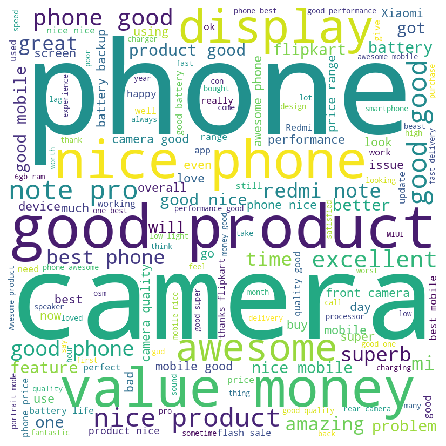

In [22]:
word_cloud1 = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 150).\
generate(combined_reviews_before_cleaning)

plt.figure(figsize = (12,6))
plt.imshow(word_cloud1)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [23]:
all_words_before_cleaning = word_tokenize(combined_reviews_before_cleaning.lower())
print(all_words_before_cleaning)

['it', "'s", 'is', 'very', 'good', 'phone', '.', 'i', 'recommend', 'to', 'buy', 'this', 'phone', 'if', 'ur', 'budget', 'is', '10k', 'to', '15k', '.', 'and', 'the', 'camera', 'is', 'tooo', 'fabulous', '.', 'and', 'screen', 'is', 'also', 'big', '.', 'i', 'love', 'this', 'phone', '.', 'thank', 'u', 'mi', 'to', 'make', 'this', 'phone', 'in', 'this', 'budget', '.', 'and', 'also', 'we', 'get', 'a', 'great', 'processor', '.', '🌟💸', 'nice', 'great', 'picture', 'effact', 'no', 'words', 'just', 'too', 'good', 'best', 'fone', 'ever', 'i', 'usethis', 'is', '2nd', 'mi', 'device', 'for', 'me..first', 'note', '4', 'and', 'second', 'this', '.', 'note', '4', 'experience', 'was', 'very', 'bad', 'cause', 'its', 'mic', 'problem', 'but', 'this', 'device', 'is', 'excellent', '.', 'some', 'views', 'over', 'using', '1and', 'half', 'month.pros1', '.', 'selfie', 'camera', 'is', 'awesome2', 'rear', 'cam', 'is', 'also', 'good', '3battery', 'backup', 'is', 'so', 'good4', 'display', 'quality', ',', 'touch', 'respon

In [24]:
fdist = FreqDist(all_words_before_cleaning)
fdist

FreqDist({'.': 8920, 'good': 7383, 'is': 7207, 'phone': 5662, 'the': 4867, ',': 4167, 'and': 4152, 'it': 3865, '...': 3691, 'i': 3584, ...})

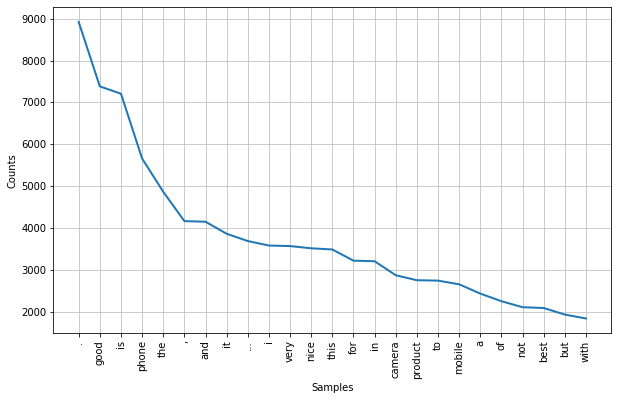

In [25]:
plt.figure(figsize = (10,6))
fdist.plot(25, cumulative = False)
plt.show()

In [26]:
words_list1 = []
for i in combined_reviews_before_cleaning.split():
    words_list1.append(i)
dictionary1 = {}
for j in words_list1:
    dictionary1[j] = dictionary1.get(j,0) + 1
series1 = pd.Series(dictionary1)
word_count_df1 = pd.DataFrame(series1).reset_index()
word_count_df1.head()

index     0
0  It's    221 
1  is      7039
2  very    2804
3  good    5129
4  phone.  379

In [27]:
word_count_df1 = word_count_df1.rename(columns = {'index': 'Words', 0: 'Frequency'})
word_count_df1.head()

Words  Frequency
0  It's    221      
1  is      7039     
2  very    2804     
3  good    5129     
4  phone.  379

In [28]:
# Finding the top 25 words before cleaning the data

top_25_words_before_cleaning = word_count_df1.sort_values(ascending = False, by = 'Frequency')
top_25_words_before_cleaning.head(25)

Words  Frequency
1     is       7039     
3     good     5129     
10    phone    4489     
17    the      4267     
57    and      3932     
53    for      3097     
9     this     3080     
29    in       3053     
2     very     2804     
7     to       2691     
5     I        2409     
37    nice     2343     
33    a        2316     
256   it       2244     
168   of       2215     
219   product  2141     
161   mobile   2087     
18    camera   2036     
523   not      1904     
121   with     1780     
68    but      1633     
44    Good     1522     
45    best     1417     
204   battery  1072     
1246  Nice     1036

### Data Cleaning

In [29]:
stop_words = stopwords.words('english')
stop_words = stop_words + ['..', '...', "n't"] + list(punctuation)
stop_words_updated = list(set(stop_words) - {'no', 'nor', 'not'})
print(stop_words_updated)

['aren', 'so', 'theirs', 'both', 'from', '"', 'those', 'here', 'there', 'ma', 'needn', 'your', 'out', '$', 'on', "aren't", 'under', '+', 'i', "shan't", 'which', 'can', 'that', 'were', "it's", 'against', 'same', '-', 'than', "isn't", 'very', ']', "you've", 'our', '>', '|', 'now', 'at', 'couldn', 'doing', 'down', '^', "didn't", 'she', "hasn't", 'have', "doesn't", 'shan', 'hasn', 'didn', "n't", '}', 'these', 'shouldn', 'or', 'won', 't', "mustn't", 'him', 'herself', "couldn't", 'don', 'myself', 'had', 'wouldn', 'isn', 'until', 'each', '_', '=', 'a', 'then', 'where', '!', 'be', '#', 'his', ';', 'her', 'about', 'too', 'ain', "you're", 'if', '..', '?', 'by', 'hers', '`', 'of', 'he', 'an', 'as', 'own', 'yourself', 'haven', ':', 'been', 'once', 'will', "don't", 'the', 'what', 'their', 'you', 'weren', '@', 'is', 'mightn', 'himself', "weren't", 'has', 'yourselves', 'itself', "wasn't", 'ourselves', 'why', "hadn't", '&', '*', 'its', 'because', 'we', 'but', 'does', 'up', "wouldn't", 'before', 'am', 

### I will be using Lemmatizer as it keeps all the meaningful words.

In [30]:
lemmatizer = WordNetLemmatizer()

### Cleaning the reviews

In [31]:
def clean_review(text):
    tokens = word_tokenize(text.lower())
    lemma = [lemmatizer.lemmatize(term) for term in tokens
              if term not in stop_words_updated
              and len(term) > 2]
    res = " ".join(lemma)
    return res

redmi_note_5_pro['Clean Review'] = redmi_note_5_pro['Reviews'].apply(clean_review)
redmi_note_5_pro.head()

Review Header  \
0  Must buy!           
1  Fabulous!           
2  Worth every penny   
3  Terrific purchase   
4  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very q

### Combining all the cleaned reviews

In [32]:
combined_reviews_after_cleaning = " ".join(redmi_note_5_pro['Clean Review'].values)
print(combined_reviews_after_cleaning)

good phone recommend buy phone budget 10k 15k camera tooo fabulous screen also big love phone thank make phone budget also get great processor nice great picture effact word good best fone ever usethis 2nd device me..first note second note experience bad cause mic problem device excellent view using 1and half month.pros1 selfie camera awesome2 rear cam also good 3battery backup good4 display quality touch response amazing5fingerprint sensor quick6 look awesome7potrait mode unbelievablecons1.secondary camera struggle low light face unlock little slow3 faced call drop problem friend device think problem created 9.5 upgradeoverall much satisfied phonethanks xiaomi sustain belief.and flipcart service fast amazing performance camera best range nothing say must buy one word awesome brought friend want buy also good productnice true value money best camera luv red color awesome good quality awsome superb phone♥️👌✌️ superb mobile excellent cam perfect camera phone quite good lot trouble orderi

### Preparing Word Cloud after cleaning the reviews

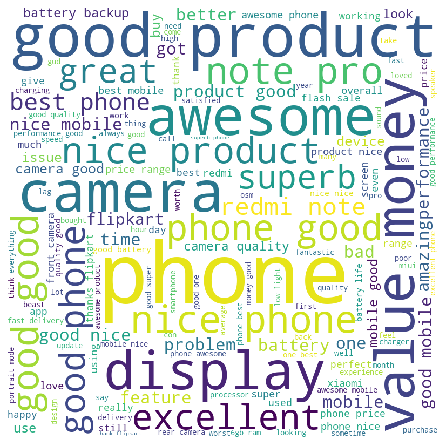

In [33]:
word_cloud2 = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 150).\
generate(combined_reviews_after_cleaning)

plt.figure(figsize = (12,6))
plt.imshow(word_cloud2)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [34]:
all_words_after_cleaning = word_tokenize(combined_reviews_after_cleaning.lower())
print(all_words_after_cleaning)

['good', 'phone', 'recommend', 'buy', 'phone', 'budget', '10k', '15k', 'camera', 'tooo', 'fabulous', 'screen', 'also', 'big', 'love', 'phone', 'thank', 'make', 'phone', 'budget', 'also', 'get', 'great', 'processor', 'nice', 'great', 'picture', 'effact', 'word', 'good', 'best', 'fone', 'ever', 'usethis', '2nd', 'device', 'me..first', 'note', 'second', 'note', 'experience', 'bad', 'cause', 'mic', 'problem', 'device', 'excellent', 'view', 'using', '1and', 'half', 'month.pros1', 'selfie', 'camera', 'awesome2', 'rear', 'cam', 'also', 'good', '3battery', 'backup', 'good4', 'display', 'quality', 'touch', 'response', 'amazing5fingerprint', 'sensor', 'quick6', 'look', 'awesome7potrait', 'mode', 'unbelievablecons1.secondary', 'camera', 'struggle', 'low', 'light', 'face', 'unlock', 'little', 'slow3', 'faced', 'call', 'drop', 'problem', 'friend', 'device', 'think', 'problem', 'created', '9.5', 'upgradeoverall', 'much', 'satisfied', 'phonethanks', 'xiaomi', 'sustain', 'belief.and', 'flipcart', 'ser

In [35]:
fdist2 = FreqDist(all_words_after_cleaning)
fdist2

FreqDist({'good': 7385, 'phone': 5919, 'nice': 3518, 'camera': 2941, 'product': 2927, 'mobile': 2732, 'not': 2112, 'best': 2093, 'awesome': 1782, 'battery': 1501, ...})

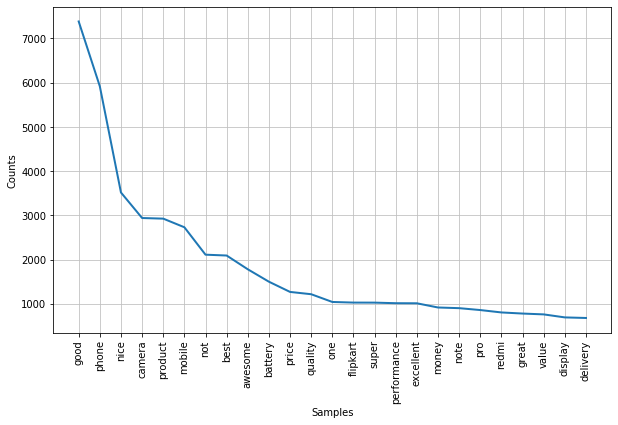

In [36]:
plt.figure(figsize = (10,6))
fdist2.plot(25, cumulative = False)
plt.show()

In [37]:
words_list2 = []
for i in combined_reviews_after_cleaning.split():
    words_list2.append(i)
dictionary2 = {}
for j in words_list2:
    dictionary2[j] = dictionary2.get(j,0) + 1
series2 = pd.Series(dictionary2)
word_count_df2 = pd.DataFrame(series2).reset_index()
word_count_df2.head()

index     0
0  good       7385
1  phone      5919
2  recommend  95  
3  buy        650 
4  budget     394

In [38]:
word_count_df2 = word_count_df2.rename(columns = {'index': 'Words', 0: 'Frequency'})
word_count_df2.head()

Words  Frequency
0  good       7385     
1  phone      5919     
2  recommend  95       
3  buy        650      
4  budget     394

In [39]:
# Finding the top 25 words after cleaning the data

top_25_words_after_cleaning = word_count_df2.sort_values(ascending = False, by = 'Frequency')
top_25_words_after_cleaning.head(25)

Words  Frequency
0    good         7385     
1    phone        5919     
19   nice         3518     
7    camera       2941     
143  product      2927     
105  mobile       2731     
317  not          2112     
23   best         2093     
92   awesome      1782     
135  battery      1498     
124  price        1270     
51   quality      1218     
91   one          1043     
166  super        1028     
345  flipkart     1027     
86   performance  1014     
37   excellent    1013     
98   money        916      
30   note         903      
119  pro          860      
383  redmi        806      
17   great        781      
97   value        762      
50   display      694      
564  delivery     681

### Top 25 most used positive, neutral and negative words

In [40]:
positive_words_list = []
negative_words_list = []
neutral_words_list = []

for word in all_words_after_cleaning:
    if (vader.polarity_scores(word)['compound']) > 0:
        positive_words_list.append(word)
    elif (vader.polarity_scores(word)['compound']) < 0:
        negative_words_list.append(word)
    else:
        neutral_words_list.append(word)
        
print('Positive Words: ', len(positive_words_list))
print('Negative Words: ', len(negative_words_list))
print('Neutral Words: ', len(neutral_words_list))

Positive Words:  28518
Negative Words:  4063
Neutral Words:  103185


In [41]:
positive_words_count = {}

for i in positive_words_list:
    positive_words_count[i] = positive_words_count.get(i,0)+1
positive_words_series = pd.Series(positive_words_count)

positive_words_df = pd.DataFrame(positive_words_series).reset_index()
positive_words_df = positive_words_df.rename(columns = {'index':'Words', 0:'Frequency'})
positive_words_df.head()

Words  Frequency
0  good       7385     
1  recommend  95       
2  fabulous   73       
3  love       419      
4  thank      208

In [42]:
top_25_positive_words = positive_words_df.sort_values(by = 'Frequency', ascending = False).head(25)
top_25_positive_words

Words  Frequency
0    good       7385     
6    nice       3518     
7    best       2093     
13   awesome    1782     
20   super      1028     
8    excellent  1013     
5    great      781      
16   value      762      
34   like       680      
17   superb     649      
12   amazing    585      
25   better     454      
3    love       419      
43   thanks     407      
42   happy      361      
108  worth      308      
57   well       235      
18   perfect    222      
4    thank      208      
11   satisfied  180      
52   fine       150      
47   fantastic  139      
14   want       135      
58   loved      134      
21   smart      115

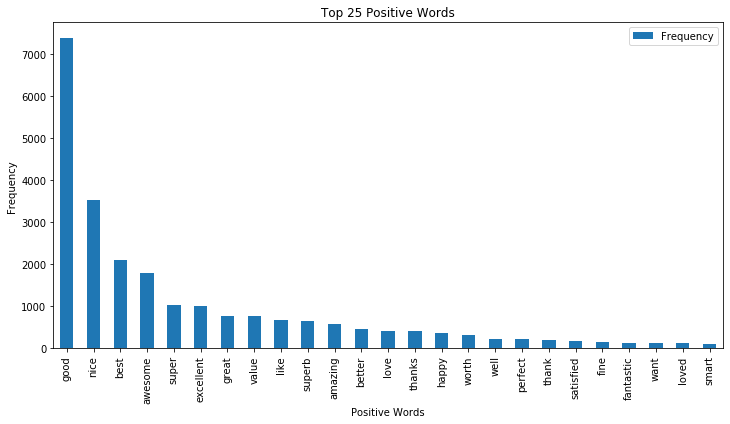

In [43]:
top_25_positive_words.plot(kind = 'bar', x = 'Words', y = 'Frequency', figsize = (12,6))
plt.ylabel('Frequency')
plt.xlabel('Positive Words')
plt.title('Top 25 Positive Words')
plt.show()

In [44]:
negative_words_count = {}

for i in negative_words_list:
    negative_words_count[i] = negative_words_count.get(i,0)+1
negative_words_series = pd.Series(negative_words_count)

negative_words_df = pd.DataFrame(negative_words_series).reset_index()
negative_words_df = negative_words_df.rename(columns = {'index':'Words', 0:'Frequency'})
negative_words_df.head()

Words  Frequency
0  bad       491      
1  problem   539      
2  struggle  11       
3  low       353      
4  drop      24

In [45]:
top_25_negative_words = negative_words_df.sort_values(by = 'Frequency', ascending = False).head(25)
top_25_negative_words

Words  Frequency
1    problem       539      
0    bad           491      
3    low           353      
39   worst         198      
34   poor          192      
17   lag           153      
36   disappointed  92       
93   waste         64       
86   doubt         52       
16   missing       45       
35   lagging       42       
29   complaint     41       
140  damage        39       
57   stop          36       
130  broken        32       
135  damaged       31       
13   difficult     31       
94   stopped       30       
43   lack          30       
8    hard          30       
79   pathetic      27       
81   killer        27       
20   defective     26       
116  charged       25       
49   hate          25

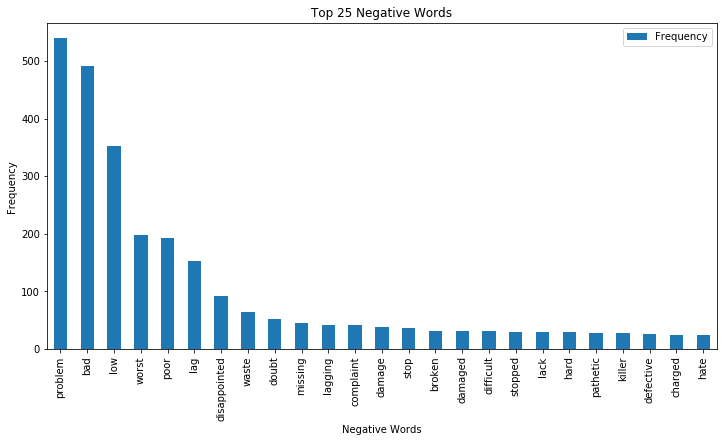

In [46]:
top_25_negative_words.plot(kind = 'bar', x = 'Words', y = 'Frequency', figsize = (12,6))
plt.ylabel('Frequency')
plt.xlabel('Negative Words')
plt.title('Top 25 Negative Words')
plt.show()

In [47]:
neutral_words_count = {}

for i in neutral_words_list:
    neutral_words_count[i] = neutral_words_count.get(i,0)+1
neutral_words_series = pd.Series(neutral_words_count)

neutral_words_df = pd.DataFrame(neutral_words_series).reset_index()
neutral_words_df = neutral_words_df.rename(columns = {'index':'Words', 0:'Frequency'})
neutral_words_df.head()

Words  Frequency
0  phone   5919     
1  buy     650      
2  budget  394      
3  10k     10       
4  15k     148

In [48]:
top_25_neutral_words = neutral_words_df.sort_values(by = 'Frequency', ascending = False).head(25)
top_25_neutral_words

Words  Frequency
0    phone        5919     
5    camera       2941     
117  product      2927     
82   mobile       2732     
277  not          2112     
109  battery      1501     
98   price        1270     
40   quality      1218     
73   one          1043     
302  flipkart     1029     
68   performance  1015     
76   money        918      
22   note         903      
93   pro          860      
335  redmi        806      
39   display      694      
486  delivery     681      
8    also         679      
270  time         663      
1    buy          650      
103  day          649      
67   fast         620      
28   using        531      
121  issue        530      
208  got          492

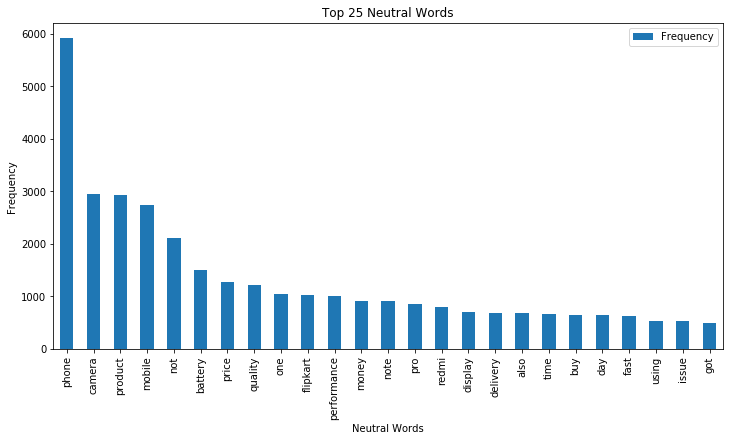

In [49]:
top_25_neutral_words.plot(kind = 'bar', x = 'Words', y = 'Frequency', figsize = (12,6))
plt.ylabel('Frequency')
plt.xlabel('Neutral Words')
plt.title('Top 25 Neutral Words')
plt.show()

### n-gram Analysis: Top 25 Unigram, Bigram and Trigram

In [50]:
count_vect_unigram = CountVectorizer(ngram_range = (1,1), max_features = 25)
unigram = count_vect_unigram.fit_transform(redmi_note_5_pro['Clean Review'])
print(count_vect_unigram.get_feature_names())

['awesome', 'battery', 'best', 'camera', 'delivery', 'display', 'excellent', 'flipkart', 'good', 'great', 'mobile', 'money', 'nice', 'not', 'note', 'one', 'performance', 'phone', 'price', 'pro', 'product', 'quality', 'redmi', 'super', 'value']


In [51]:
DTM_unigram = pd.DataFrame(unigram.toarray(), columns = count_vect_unigram.get_feature_names())
DTM_unigram.head()

awesome  battery  best  camera  delivery  display  excellent  flipkart  \
0  0        0        0     1       0         0        0          0          
1  0        0        0     0       0         0        0          0          
2  0        0        0     0       0         0        0          0          
3  0        0        0     0       0         0        0          0          
4  0        0        1     2       0         1        1          0          

   good  great  ...  one  performance  phone  price  pro  product  quality  \
0  1     1      ...  0    0            4      0      0    0        0         
1  0     0      ...  0    0            0      0      0    0        0         
2  0     1      ...  0    0            0      0      0    0        0         
3  1     0      ...  0    0            0      0      0    0        0         
4  1     0      ...  0    0            0      0      0    0        1         

   redmi  super  value  
0  0      0      0      
1  0      0      0      
2  0      0      0      
3  0      0      0      
4  0      0      0      

[5 rows x 25 columns]

In [52]:
top_25_unigram = DTM_unigram.sum().sort_values(ascending = False)
top_25_unigram

good           7655
phone          6190
nice           3583
camera         3172
product        3043
mobile         2837
best           2190
not            2130
awesome        1908
battery        1643
price          1330
quality        1268
performance    1106
one            1103
flipkart       1083
excellent      1073
super          1060
money          1003
note           921 
pro            915 
great          834 
redmi          821 
value          804 
display        772 
delivery       717 
dtype: int64

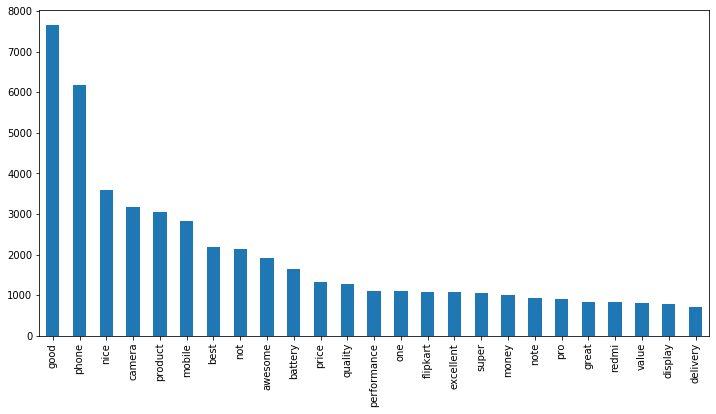

In [53]:
top_25_unigram.plot(kind = 'bar', x = 'Words', y = 'Count', figsize = (12,6))
plt.show()

In [54]:
count_vect_bigram = CountVectorizer(ngram_range = (2,2), max_features = 25)
bigram = count_vect_bigram.fit_transform(redmi_note_5_pro['Clean Review'])
print(count_vect_bigram.get_feature_names())

['awesome phone', 'battery backup', 'battery life', 'best mobile', 'best phone', 'camera good', 'camera quality', 'flash sale', 'front camera', 'good camera', 'good mobile', 'good phone', 'good product', 'nice mobile', 'nice phone', 'nice product', 'not good', 'note pro', 'phone good', 'phone price', 'price range', 'rear camera', 'redmi note', 'thanks flipkart', 'value money']


In [55]:
DTM_bigram = pd.DataFrame(bigram.toarray(), columns = count_vect_bigram.get_feature_names())
DTM_bigram.head()

awesome phone  battery backup  battery life  best mobile  best phone  \
0  0              0               0             0            0            
1  0              0               0             0            0            
2  0              0               0             0            0            
3  0              0               0             0            0            
4  0              0               0             0            0            

   camera good  camera quality  flash sale  front camera  good camera  ...  \
0  0            0               0           0             0            ...   
1  0            0               0           0             0            ...   
2  0            0               0           0             0            ...   
3  0            0               0           0             0            ...   
4  0            0               0           0             0            ...   

   nice product  not good  note pro  phone good  phone price  price range  \
0  0             0         0         0           0            0             
1  0             0         0         0           0            0             
2  0             0         0         0           0            0             
3  0             0         0         0           0            0             
4  0             0         0         0           0            0             

   rear camera  redmi note  thanks flipkart  value money  
0  0            0           0                0            
1  0            0           0                0            
2  0            0           0                0            
3  0            0           0                0            
4  0            0           0                0            

[5 rows x 25 columns]

In [56]:
top_25_bigram = DTM_bigram.sum().sort_values(ascending = False)
top_25_bigram

good product       865
value money        715
nice phone         647
note pro           641
nice product       591
good phone         533
redmi note         492
best phone         478
good mobile        392
nice mobile        383
not good           347
battery backup     328
camera quality     324
awesome phone      308
front camera       294
price range        280
best mobile        260
camera good        233
phone price        221
phone good         219
good camera        213
thanks flipkart    211
flash sale         207
battery life       197
rear camera        176
dtype: int64

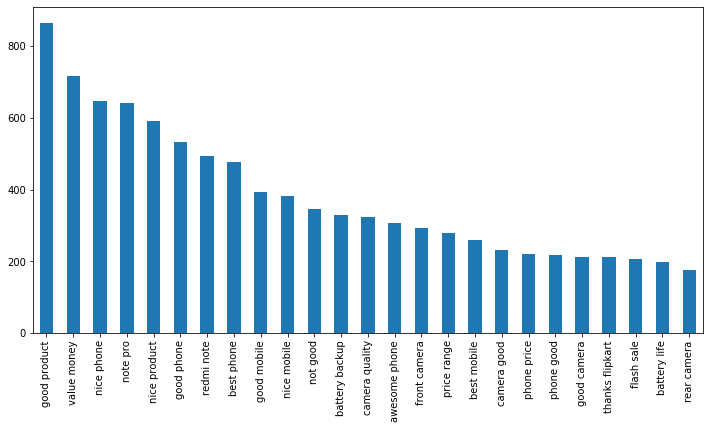

In [57]:
top_25_bigram.plot(kind = 'bar', x = 'Words', y = 'Count', figsize = (12,6))
plt.show()

In [58]:
count_vect_trigram = CountVectorizer(ngram_range = (3,3), max_features = 25)
trigram = count_vect_trigram.fit_transform(redmi_note_5_pro['Clean Review'])
print(count_vect_trigram.get_feature_names())

['bad bad bad', 'battery backup good', 'best budget phone', 'best phone ever', 'best phone price', 'camera good battery', 'camera not good', 'camera quality good', 'front camera good', 'good battery backup', 'good battery life', 'good mobile phone', 'good phone price', 'good product price', 'good value money', 'hybrid sim slot', 'not working properly', 'note pro best', 'one best phone', 'phone price range', 'phone value money', 'product thanks flipkart', 'product value money', 'redmi note 5pro', 'redmi note pro']


In [59]:
DTM_trigram = pd.DataFrame(trigram.toarray(), columns = count_vect_trigram.get_feature_names())
DTM_trigram.head()

bad bad bad  battery backup good  best budget phone  best phone ever  \
0  0            0                    0                  0                 
1  0            0                    0                  0                 
2  0            0                    0                  0                 
3  0            0                    0                  0                 
4  0            0                    0                  0                 

   best phone price  camera good battery  camera not good  \
0  0                 0                    0                 
1  0                 0                    0                 
2  0                 0                    0                 
3  0                 0                    0                 
4  0                 0                    0                 

   camera quality good  front camera good  good battery backup  ...  \
0  0                    0                  0                    ...   
1  0                    0                  0                    ...   
2  0                    0                  0                    ...   
3  0                    0                  0                    ...   
4  0                    0                  0                    ...   

   hybrid sim slot  not working properly  note pro best  one best phone  \
0  0                0                     0              0                
1  0                0                     0              0                
2  0                0                     0              0                
3  0                0                     0              0                
4  0                0                     0              0                

   phone price range  phone value money  product thanks flipkart  \
0  0                  0                  0                         
1  0                  0                  0                         
2  0                  0                  0                         
3  0                  0                  0                         
4  0                  0                  0                         

   product value money  redmi note 5pro  redmi note pro  
0  0                    0                0               
1  0                    0                0               
2  0                    0                0               
3  0                    0                0               
4  0                    0                0               

[5 rows x 25 columns]

In [60]:
top_25_trigram = DTM_trigram.sum().sort_values(ascending = False)
top_25_trigram

redmi note pro             367
phone price range          76 
phone value money          65 
camera not good            62 
best phone ever            61 
good battery backup        55 
best phone price           55 
battery backup good        51 
not working properly       50 
camera quality good        45 
bad bad bad                44 
good value money           43 
one best phone             40 
best budget phone          40 
product value money        39 
good phone price           37 
good mobile phone          36 
front camera good          35 
redmi note 5pro            32 
note pro best              32 
hybrid sim slot            31 
good product price         30 
camera good battery        30 
good battery life          29 
product thanks flipkart    29 
dtype: int64

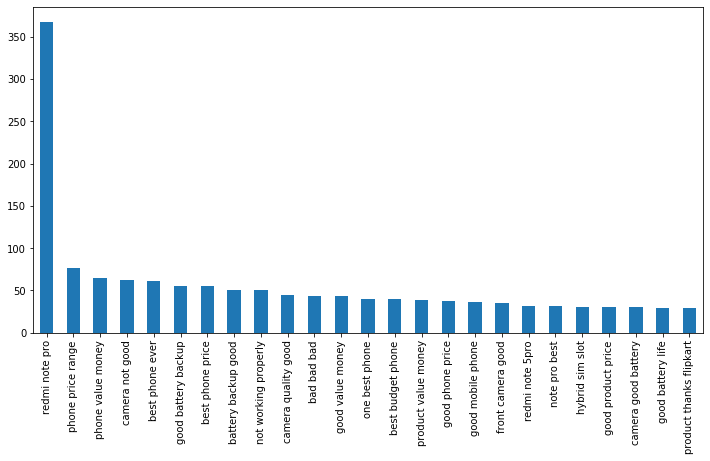

In [61]:
top_25_trigram.plot(kind = 'bar', x = 'Words', y = 'Count', figsize = (12,6))
plt.show()

### Sentiment Analysis

In [62]:
afinn = pd.read_csv('C:/Users/Subhadri/Desktop/Data Science/Term 2/Unstructured Data Analysis/Text Analytics/AFINN-111.txt', \
                    sep = '\t', header = None)
afinn.head()

0  1
0  abandon   -2
1  abandoned -2
2  abandons  -2
3  abducted  -2
4  abduction -2

In [63]:
afinn.columns = ['Term', 'Sentiment Score']
afinn.head()

Term  Sentiment Score
0  abandon   -2              
1  abandoned -2              
2  abandons  -2              
3  abducted  -2              
4  abduction -2

In [64]:
term_scores = dict(afinn.values)
print(term_scores)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

### Strategy 1: Sentiment Prediction

In [65]:
def get_sentiment_score1(text):
    score = 0
    token = word_tokenize(text.lower())
    for i in token:
        score += term_scores.get(i,0)
    return score

redmi_note_5_pro['Sentiment Score1'] = redmi_note_5_pro['Clean Review'].apply(get_sentiment_score1)
redmi_note_5_pro.head()

Review Header  \
0  Must buy!           
1  Fabulous!           
2  Worth every penny   
3  Terrific purchase   
4  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very q

In [66]:
print(redmi_note_5_pro['Sentiment Score1'].min())
print(redmi_note_5_pro['Sentiment Score1'].max())

-96
117


In [67]:
redmi_note_5_pro['Sentiment Prediction1'] = redmi_note_5_pro['Sentiment Score1'].apply (lambda x:1 if x>0 else 0)
redmi_note_5_pro.head()

Review Header  \
0  Must buy!           
1  Fabulous!           
2  Worth every penny   
3  Terrific purchase   
4  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very q

In [68]:
redmi_note_5_pro['Sentiment Prediction1'].value_counts()

1    16081
0    3789 
Name: Sentiment Prediction1, dtype: int64

In [69]:
# Checking the accuracy

accuracy_score(redmi_note_5_pro['Sentiment'], redmi_note_5_pro['Sentiment Prediction1']) * 100

82.99949672873679

#### Let's check the accuracy without using lemmatization

In [70]:
def clean_review_unlemmatized(text):
    tokens = word_tokenize(text.lower())
    terms = [term for term in tokens
              if term not in stop_words_updated
              and len(term) > 2]
    res = " ".join(terms)
    return res

redmi_note_5_pro['Clean Review Unlemmatized'] = redmi_note_5_pro['Reviews'].apply(clean_review_unlemmatized)
redmi_note_5_pro.head()

Review Header  \
0  Must buy!           
1  Fabulous!           
2  Worth every penny   
3  Terrific purchase   
4  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very q

In [71]:
def get_sentiment_score2(text):
    score = 0
    token = word_tokenize(text.lower())
    for i in token:
        score += term_scores.get(i,0)
    return score

redmi_note_5_pro['Sentiment Score2'] = redmi_note_5_pro['Clean Review Unlemmatized'].apply(get_sentiment_score2)
redmi_note_5_pro.head()

Review Header  \
0  Must buy!           
1  Fabulous!           
2  Worth every penny   
3  Terrific purchase   
4  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very q

In [72]:
print(redmi_note_5_pro['Sentiment Score2'].min())
print(redmi_note_5_pro['Sentiment Score2'].max())

-96
115


In [73]:
redmi_note_5_pro['Sentiment Prediction2'] = redmi_note_5_pro['Sentiment Score2'].apply (lambda x:1 if x>0 else 0)
redmi_note_5_pro.head()

Review Header  \
0  Must buy!           
1  Fabulous!           
2  Worth every penny   
3  Terrific purchase   
4  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very q

In [74]:
redmi_note_5_pro['Sentiment Prediction2'].value_counts()

1    16075
0    3795 
Name: Sentiment Prediction2, dtype: int64

In [75]:
# Checking the accuracy

accuracy_score(redmi_note_5_pro['Sentiment'], redmi_note_5_pro['Sentiment Prediction2']) * 100

82.97936587820836

### Strategy 2: Vader

In [76]:
analyzer = SentimentIntensityAnalyzer()

In [77]:
def get_vader_score(text):
    return analyzer.polarity_scores(text)['compound']

redmi_note_5_pro['Vader Score'] = redmi_note_5_pro['Reviews'].apply(get_vader_score)
redmi_note_5_pro.head()

Review Header  \
0  Must buy!           
1  Fabulous!           
2  Worth every penny   
3  Terrific purchase   
4  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very q

In [78]:
print(redmi_note_5_pro['Vader Score'].min())
print(redmi_note_5_pro['Vader Score'].max())

-0.9993
0.9992


In [79]:
redmi_note_5_pro['Vader Prediction'] = redmi_note_5_pro['Vader Score'].apply (lambda x:1 if x>0 else 0)
redmi_note_5_pro.head()

Review Header  \
0  Must buy!           
1  Fabulous!           
2  Worth every penny   
3  Terrific purchase   
4  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very q

In [80]:
redmi_note_5_pro['Vader Prediction'].value_counts()

1    16047
0    3823 
Name: Vader Prediction, dtype: int64

In [81]:
accuracy_score(redmi_note_5_pro['Sentiment'], redmi_note_5_pro['Vader Prediction']) * 100

84.45898339204831

#### Let's give some labels based on the 'Vader Score' and build a multiclass classification model

In [82]:
label = []
for i in redmi_note_5_pro['Vader Score']:
    if i >= -1 and i < -0.6:
        label.append('Very bad')
    elif i >= -0.6 and i < -0.2:
        label.append('Bad')
    elif i >= -0.2 and i < 0.2:
        label.append('Neutral')
    elif i >= 0.2 and i < 0.6:
        label.append('Good')
    else:
        label.append('Very good')
        
redmi_note_5_pro['Vader Label'] = label
redmi_note_5_pro.head()

Review Header  \
0  Must buy!           
1  Fabulous!           
2  Worth every penny   
3  Terrific purchase   
4  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very q

In [83]:
redmi_note_5_pro['Vader Label'].value_counts()

Good         9557
Very good    6269
Neutral      2524
Bad          1022
Very bad     498 
Name: Vader Label, dtype: int64

### Multinomial Naive Bayes using both Count Vectorizer and Tfidf Vectroizer

In [84]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [85]:
redmi_note_5_pro['Vader Label Encoded'] = le.fit_transform(redmi_note_5_pro['Vader Label'])
redmi_note_5_pro.head()

Review Header  \
0  Must buy!           
1  Fabulous!           
2  Worth every penny   
3  Terrific purchase   
4  Terrific purchase   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2  great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4  best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad cause its mic problem but this device is excellent. some views over using 1and half month.pros1. Selfie camera is awesome2 Rear cam is also good 3battery backup is so good4 display quality, touch response amazing5fingerprint sensor very q

In [86]:
x = redmi_note_5_pro['Reviews']
y = redmi_note_5_pro['Vader Label Encoded']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [88]:
x_train_cv = count_vect.fit_transform(x_train)
x_test_cv = count_vect.transform(x_test)
print(x_train_cv.shape, x_test_cv.shape)

(15896, 8642) (3974, 8642)


In [89]:
x_train_tv = tfidf_vect.fit_transform(x_train)
x_test_tv = tfidf_vect.transform(x_test)
print(x_train_tv.shape, x_test_tv.shape)

(15896, 8642) (3974, 8642)


In [90]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

##### Multinomial Naive Bayes using CountVectorizer

In [91]:
mnb.fit(x_train_cv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [92]:
y_pred_cv = mnb.predict(x_test_cv)

In [93]:
mnb_accuracy_cv = accuracy_score(y_test, y_pred_cv) * 100
print('Accuracy:', mnb_accuracy_cv)

Accuracy: 70.10568696527429


In [94]:
mnb_cm_cv = confusion_matrix(y_test, y_pred_cv)
print('Confusion Matrix:', mnb_cm_cv, sep = '\n')

Confusion Matrix:
[[  23   85   14   18   91]
 [  13 1700    7    5  241]
 [   7  187  106    9  154]
 [  11   24    5   37   34]
 [   1  277    3    2  920]]


In [95]:
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       0.42      0.10      0.16       231
           1       0.75      0.86      0.80      1966
           2       0.79      0.23      0.35       463
           3       0.52      0.33      0.41       111
           4       0.64      0.76      0.70      1203

    accuracy                           0.70      3974
   macro avg       0.62      0.46      0.48      3974
weighted avg       0.69      0.70      0.67      3974



##### Multinomial Naive Bayes using TfidfVectorizer

In [96]:
mnb.fit(x_train_tv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [97]:
y_pred_tv = mnb.predict(x_test_tv)

In [98]:
mnb_accuracy_tv = accuracy_score(y_test, y_pred_tv) * 100
print('Accuracy:', mnb_accuracy_tv)

Accuracy: 68.8978359335682


In [99]:
mnb_cm_tv = confusion_matrix(y_test, y_pred_tv)
print('Confusion Matrix:', mnb_cm_tv, sep = '\n')

Confusion Matrix:
[[   4   94    5    0  128]
 [   0 1675    1    0  290]
 [   0  189   84    0  190]
 [   0   37    1    2   71]
 [   0  230    0    0  973]]


In [100]:
print(classification_report(y_test, y_pred_tv))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03       231
           1       0.75      0.85      0.80      1966
           2       0.92      0.18      0.30       463
           3       1.00      0.02      0.04       111
           4       0.59      0.81      0.68      1203

    accuracy                           0.69      3974
   macro avg       0.85      0.38      0.37      3974
weighted avg       0.74      0.69      0.64      3974



### Strategy 3: Model Building

In [101]:
x = redmi_note_5_pro['Clean Review']
y = redmi_note_5_pro['Sentiment']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [103]:
x_train_cv = count_vect.fit_transform(x_train)
x_test_cv = count_vect.transform(x_test)
print(x_train_cv.shape, x_test_cv.shape)

(15896, 8086) (3974, 8086)


In [104]:
x_train_tv = tfidf_vect.fit_transform(x_train)
x_test_tv = tfidf_vect.transform(x_test)
print(x_train_tv.shape, x_test_tv.shape)

(15896, 8086) (3974, 8086)


#### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

#### Logistic Regression using Count Vectorizer

In [106]:
LogReg.fit(x_train_cv, y_train)

C:\Users\Subhadri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
y_pred_cv = LogReg.predict(x_test_cv)

In [108]:
LogReg_accuracy_cv = accuracy_score(y_test, y_pred_cv) * 100
print('Accuracy:', LogReg_accuracy_cv)

Accuracy: 92.14896829391041


In [109]:
cm1 = confusion_matrix(y_test, y_pred_cv)
print('Confusion Matrix:', cm1, sep = '\n')

Confusion Matrix:
[[ 239  252]
 [  60 3423]]


In [110]:
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       0.80      0.49      0.61       491
           1       0.93      0.98      0.96      3483

    accuracy                           0.92      3974
   macro avg       0.87      0.73      0.78      3974
weighted avg       0.92      0.92      0.91      3974



#### Logistic Regression using TFIDF Vectorizer

In [111]:
LogReg.fit(x_train_tv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_pred_tv = LogReg.predict(x_test_tv)

In [113]:
LogReg_accuracy_tv = accuracy_score(y_test, y_pred_tv) * 100
print('Accuracy:', LogReg_accuracy_tv)

Accuracy: 91.79667840966282


In [114]:
cm2 = confusion_matrix(y_test, y_pred_tv)
print('Confusion Matrix:', cm2, sep = '\n')

Confusion Matrix:
[[ 217  274]
 [  52 3431]]


In [115]:
print(classification_report(y_test, y_pred_tv))

              precision    recall  f1-score   support

           0       0.81      0.44      0.57       491
           1       0.93      0.99      0.95      3483

    accuracy                           0.92      3974
   macro avg       0.87      0.71      0.76      3974
weighted avg       0.91      0.92      0.91      3974



#### Gaussian Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

#### Gaussian Naive Bayes using Count Vectorizer

In [117]:
gnb.fit(x_train_cv.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [118]:
y_pred_cv = gnb.predict(x_test_cv.toarray())

In [119]:
gnb_accuracy_cv = accuracy_score(y_test, y_pred_cv) * 100
print('Accuracy:', gnb_accuracy_cv)

Accuracy: 24.383492702566684


In [120]:
cm3 = confusion_matrix(y_test, y_pred_cv)
print('Confusion Matrix:', cm3, sep = '\n')

Confusion Matrix:
[[ 407   84]
 [2921  562]]


In [121]:
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       0.12      0.83      0.21       491
           1       0.87      0.16      0.27      3483

    accuracy                           0.24      3974
   macro avg       0.50      0.50      0.24      3974
weighted avg       0.78      0.24      0.26      3974



#### Gaussian Naive Bayes using TFIDF Vectorizer

In [122]:
gnb.fit(x_train_tv.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [123]:
y_pred_tv = gnb.predict(x_test_tv.toarray())

In [124]:
gnb_accuracy_tv = accuracy_score(y_test, y_pred_tv) * 100
print('Accuracy:', gnb_accuracy_tv)

Accuracy: 25.893306492199297


In [125]:
cm4 = confusion_matrix(y_test, y_pred_tv)
print('Confusion Matrix:', cm4, sep = '\n')

Confusion Matrix:
[[ 401   90]
 [2855  628]]


In [126]:
print(classification_report(y_test, y_pred_tv))

              precision    recall  f1-score   support

           0       0.12      0.82      0.21       491
           1       0.87      0.18      0.30      3483

    accuracy                           0.26      3974
   macro avg       0.50      0.50      0.26      3974
weighted avg       0.78      0.26      0.29      3974



### Clustering

In [127]:
tfidf_vect = TfidfVectorizer(max_features = 150)

In [128]:
X = tfidf_vect.fit_transform(redmi_note_5_pro['Clean Review'])

In [129]:
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters = num_clusters, random_state = 0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [130]:
pred_cluster = km.predict(X)
redmi_note_5_pro['Cluster Predicted'] = pred_cluster
redmi_note_5_pro['Cluster Predicted'].value_counts()

0    12040
2    2909 
3    2112 
1    2003 
4    806  
Name: Cluster Predicted, dtype: int64

In [131]:
pred_cluster.shape

(19870,)

In [132]:
km.cluster_centers_.shape

(5, 150)

In [133]:
print("Top 5 terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, : 5]:
        print (' %s' % terms[ind])

Top 5 terms per cluster:
Cluster 0:
 phone
 awesome
 best
 mobile
 camera
Cluster 1:
 product
 good
 nice
 awesome
 best
Cluster 2:
 good
 phone
 mobile
 quality
 one
Cluster 3:
 nice
 phone
 mobile
 camera
 one
Cluster 4:
 super
 mobile
 phone
 product
 camera


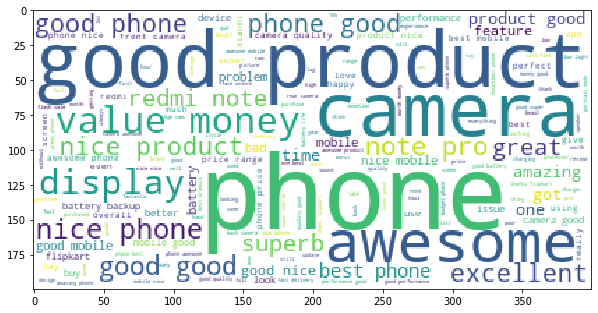

In [134]:
cluster0 = redmi_note_5_pro[redmi_note_5_pro['Cluster Predicted'] == 0]
text0 = ' '.join(redmi_note_5_pro['Clean Review'])
wc0 = WordCloud(background_color = 'white').generate(text0)
plt.figure(figsize = (10,6))
plt.imshow(wc0)

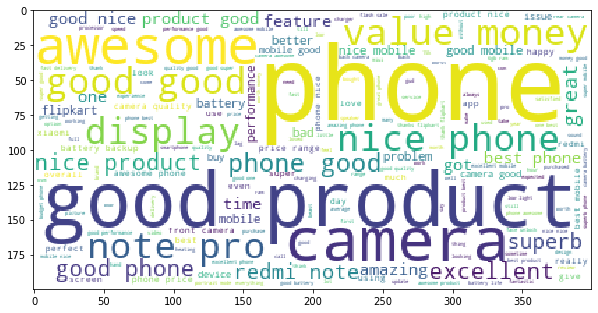

In [135]:
cluster1 = redmi_note_5_pro[redmi_note_5_pro['Cluster Predicted'] == 1]
text1 = ' '.join(redmi_note_5_pro['Clean Review'])
wc1 = WordCloud(background_color = 'white').generate(text1)
plt.figure(figsize = (10,6))
plt.imshow(wc1)

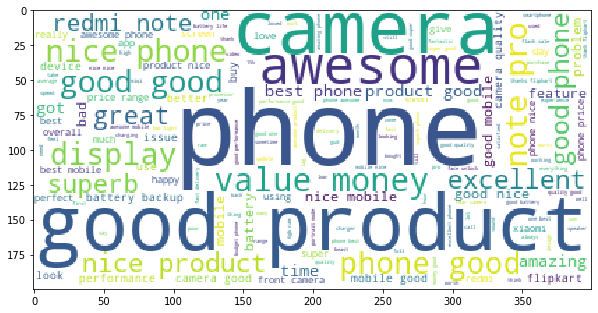

In [136]:
cluster2 = redmi_note_5_pro[redmi_note_5_pro['Cluster Predicted'] == 2]
text2 = ' '.join(redmi_note_5_pro['Clean Review'])
wc2 = WordCloud(background_color = 'white').generate(text2)
plt.figure(figsize = (10,6))
plt.imshow(wc2)

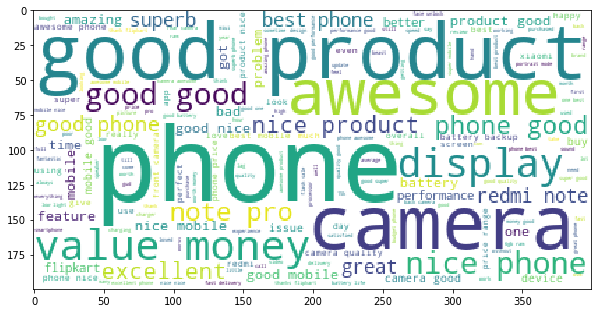

In [137]:
cluster3 = redmi_note_5_pro[redmi_note_5_pro['Cluster Predicted'] == 3]
text3 = ' '.join(redmi_note_5_pro['Clean Review'])
wc3 = WordCloud(background_color = 'white').generate(text3)
plt.figure(figsize = (10,6))
plt.imshow(wc3)

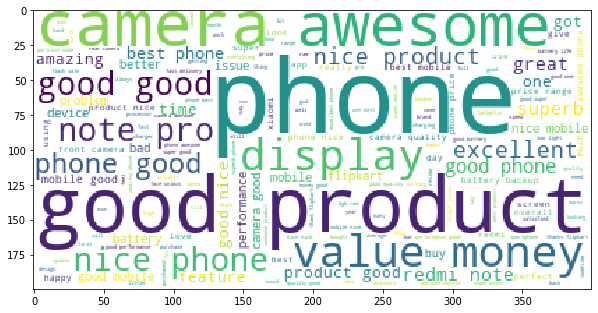

In [138]:
cluster4 = redmi_note_5_pro[redmi_note_5_pro['Cluster Predicted'] == 4]
text4 = ' '.join(redmi_note_5_pro['Clean Review'])
wc4 = WordCloud(background_color = 'white').generate(text4)
plt.figure(figsize = (10,6))
plt.imshow(wc4)

### Cosine Similarity

In [139]:
tfidf = TfidfVectorizer(stop_words = 'english')
X = tfidf.fit_transform(redmi_note_5_pro['Clean Review'])

In [140]:
df_tfidf = pd.DataFrame(X.toarray(), columns = tfidf.get_feature_names())
df_tfidf.head()

00  000  000mah  000phone  000rs  00am  00pm   01   02   03  ...  \
0  0.0  0.0  0.0     0.0       0.0    0.0   0.0   0.0  0.0  0.0  ...   
1  0.0  0.0  0.0     0.0       0.0    0.0   0.0   0.0  0.0  0.0  ...   
2  0.0  0.0  0.0     0.0       0.0    0.0   0.0   0.0  0.0  0.0  ...   
3  0.0  0.0  0.0     0.0       0.0    0.0   0.0   0.0  0.0  0.0  ...   
4  0.0  0.0  0.0     0.0       0.0    0.0   0.0   0.0  0.0  0.0  ...   

   zenofone  zenphone  zero  zindagi  zoom  zoomed  zooming  zot  αωѕσмє  ρяσ  
0  0.0       0.0       0.0   0.0      0.0   0.0     0.0      0.0  0.0     0.0  
1  0.0       0.0       0.0   0.0      0.0   0.0     0.0      0.0  0.0     0.0  
2  0.0       0.0       0.0   0.0      0.0   0.0     0.0      0.0  0.0     0.0  
3  0.0       0.0       0.0   0.0      0.0   0.0     0.0      0.0  0.0     0.0  
4  0.0       0.0       0.0   0.0      0.0   0.0     0.0      0.0  0.0     0.0  

[5 rows x 8956 columns]

In [141]:
redmi_note_5_pro[redmi_note_5_pro['Sentiment'] == 0]

Review Header  \
70     Bluffing the Customer with 10 Days Return Policy     
75     flipkart fooling customers                           
118    Absolute rubbish!                                    
126    dont update softwre.camera battery become very por   
130    Unsatisfactory                                       
...               ...                                       
19823  Fair                                                 
19829  Fair                                                 
19847  Worthless                                            
19854  Does the job                                         
19864  Decent product                                       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Reviews  \
70     Sent me a defective  handset which is having heating & battery draining issue, my handset reaching 45 to 48c heat and battery is getting drained with in 6 to 7 hours of minimum usage when i have reported the issue they are ready to time pass on it rather than solving it. The Technical guys who visited my house spent 5 min of time and play some Youtube videos and decides that the handset is working fine they don't use any tools they don't run any diagnostics to check the issue and they will be ready to close the case by showing that technical person has helped to solve the issue. After killing 10 days when i have reported the same thing they have come up with an answer that your 10 days time has passed and your are not eligible.   
75     Seller cancels order after receiving payment after putting so much effort and wasting time on their flash sale they simply cancel your order and then you dont know when you wil get your money back.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
118    After many attempts to purchase a Redmi note 5 pro in flash sales, I finally got a chance to buy one on 6th July as a gift to my relative.turns out that the phone has a defective selfy camera. and till date even after multiple verifications by flipkart technicians replacement is not done. Sick and tired of flipkart service.this is the status of affairs for purchasing a flipkart assured product                                                                                                                                                                                                                                                                                                                                                        
126    super camera..but dont update software..i update software then camera become poor. afrer i update my phone camera work like 5 mp camera...poor piccs  battery back up after software update become poor ...dont update..                                                                                                

In [142]:
redmi_note_5_pro[redmi_note_5_pro['Sentiment'] == 1]

Review Header  \
0      Must buy!             
1      Fabulous!             
2      Worth every penny     
3      Terrific purchase     
4      Terrific purchase     
...                  ...     
19865  Best in the market!   
19866  Must buy!             
19867  Super!                
19868  Just wow!             
19869  Fabulous!             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Reviews  \
0      It's is very good phone. I recommend to buy this phone if ur budget is 10k to 15k. And the camera is tooo fabulous. And screen is also big.  I love this phone.  Thank u MI to make this phone in this budget. And also we get a great processor. 🌟💸                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1      nice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2      great picture effact                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3      no words just Too Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4      best fone ever i usethis is 2nd mi device for me..first note 4 and second this. Note 4 experience was very bad caus

In [143]:
redmi_note_5_pro['Clean Review'][126]

'super camera..but dont update software..i update software camera become poor afrer update phone camera work like camera poor piccs battery back software update become poor dont update..'

In [144]:
redmi_note_5_pro['Clean Review'][0]

'good phone recommend buy phone budget 10k 15k camera tooo fabulous screen also big love phone thank make phone budget also get great processor'

In [145]:
from sklearn.metrics.pairwise import cosine_similarity

cs = cosine_similarity(df_tfidf)

#### For the above two reviews, redmi_note_5_pro['Clean Review'][126] and redmi_note_5_pro['Clean Review'][0], find the top 5 similar reviews.

In [146]:
top_5_similar_reviews1 = cs[126].argsort()[::-1][1:6]
top_5_similar_reviews1

array([ 8718,  3221,  2132, 18561,  2904], dtype=int64)

In [147]:
for i in top_5_similar_reviews1:
    print('Review in', i, ':', redmi_note_5_pro['Clean Review'][i])

Review in 8718 : awesome update
Review in 3221 : mobile good updating camera performance poor update
Review in 2132 : camera poor
Review in 18561 : battery back camera poor
Review in 2904 : outdated software update xiaomi


In [148]:
top_5_similar_reviews2 = cs[0].argsort()[::-1][1:6]
top_5_similar_reviews2

array([ 1323,  8980, 10460,  3593, 13567], dtype=int64)

In [149]:
for i in top_5_similar_reviews2:
    print('Review in', i, ':', redmi_note_5_pro['Clean Review'][i])

Review in 1323 : budget phone
Review in 8980 : budget phone
Review in 10460 : budget phone
Review in 3593 : budget phone
Review in 13567 : good budget phone


#### For the review with both highest and least polarity score, get the top 5 similar reviews.

In [150]:
redmi_note_5_pro[redmi_note_5_pro['Vader Score'] == redmi_note_5_pro['Vader Score'].min()]

Review Header  \
10221  Absolute rubbish!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Reviews  \
10221  very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very very Very bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad Quality   

       Ratings  Sentiment  \
10221  1.0      0           

                                                                                                                                  Clean Review  \
10221  bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad quality   

       Sentiment Score1  Sentiment Prediction1  \
10221 -96                0                       

                                                                                                                     Clean Review Unlemmatized  \
10221  bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad bad quality   

       Sentiment Score2  Sentiment Prediction2  Vader Score  Vader Prediction  \
10221 -96                0                     -0.9993       0                  

      Vader Label  Vader Label Encoded  Cluster Predicted  
10221  Very bad    3                    0

In [151]:
redmi_note_5_pro[redmi_note_5_pro['Vader Score'] == redmi_note_5_pro['Vader Score'].max()]

Review Header  \
4637  Nice Product   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Reviews  \
4637  Pros:Gorgeous Display - Front Display is better than back coverGreat Camera Quality under daylight conditions - Front camera is betterExcellent Battery Backup - Total time to charge (0% to 100%) is 2 hrs 40 min, and battery backup is 38 hrs with full day 

In [152]:
top_5_similar_reviews3 = cs[10221].argsort()[::-1][1:6]
top_5_similar_reviews3

array([ 8728, 14297, 12904, 17564,  9892], dtype=int64)

In [153]:
for i in top_5_similar_reviews3:
    print('Review in', i, ':', redmi_note_5_pro['Clean Review'][i])

Review in 8728 : bad
Review in 14297 : bad
Review in 12904 : bad
Review in 17564 : bad
Review in 9892 : not bad


In [154]:
top_5_similar_reviews4 = cs[4637].argsort()[::-1][1:6]
top_5_similar_reviews4

array([ 290, 9943,  498, 2704, 2420], dtype=int64)

In [155]:
for i in top_5_similar_reviews4:
    print('Review in', i, ':', redmi_note_5_pro['Clean Review'][i])

Review in 290 : smartphone come budget 15000 updating review day use pro gorgeous displaygreat camera quality daylight conditionsexcellent battery backupno lag multi-tasking gamingfast accurate face unlockcons fast charginghybrid sim slot sim sim memory card rating design 7/10display 8.5/10sound 9/10battery 10/10back camera 9.5/10front camera 9/10processor 10/10call quality 8.5/10face unlock fingerprint 9/10sound speaker 9/10sound earphone 8.5/10pricing 10/10overall rating 9/10deailed review get inside box:1. handset2 charger 2amps fast charger must given model provide 2amp charger still give fast speed charging usb charging cable short seems low quality design give good speed charging sim ejector pin5 transparent soft case thanks xiaomi almost saved 300 original soft cover design look decent design phone not great not bad well like 2.5d glass front give premium look phone slightly taller redmi note width bit smaller easier hold smaller width due extra length difficult hold one hand to

#### Top 5 associated words

In [156]:
def get_associated_words(input_word, sim_mat):
    cos_vals = sim_mat[input_word].sort_values(ascending = False)
    associated_words = cos_vals.drop(input_word).head()
    return associated_words

sim_mat = cosine_similarity(df_tfidf.T)
sim_mat = pd.DataFrame(sim_mat, columns = df_tfidf.columns, index = df_tfidf.columns) 

In [157]:
get_associated_words('camera', sim_mat)

quality    0.227258
battery    0.217350
rear       0.201757
display    0.137982
selfie     0.130841
Name: camera, dtype: float64

In [158]:
get_associated_words('battery', sim_mat)

backup     0.454408
life       0.262961
camera     0.217350
display    0.150125
drain      0.148170
Name: battery, dtype: float64

In [159]:
get_associated_words('screen', sim_mat)

guard         0.189679
broke         0.164258
resolution    0.140393
big           0.132850
falling       0.127535
Name: screen, dtype: float64

### Extracting nouns and adjectives from the cleaned reviews using SpaCy

In [160]:
import spacy

In [161]:
nlp = spacy.load("en_core_web_sm")

In [162]:
redmi_note_5_pro['Clean Review'][0]

'good phone recommend buy phone budget 10k 15k camera tooo fabulous screen also big love phone thank make phone budget also get great processor'

In [163]:
doc1 = nlp(redmi_note_5_pro['Clean Review'][0])
doc1

good phone recommend buy phone budget 10k 15k camera tooo fabulous screen also big love phone thank make phone budget also get great processor

In [164]:
for token in doc1:
    print(token.pos_, token.text)

ADJ good
NOUN phone
NOUN recommend
VERB buy
NOUN phone
NOUN budget
NOUN 10k
PART 15k
NOUN camera
NOUN tooo
ADJ fabulous
NOUN screen
ADV also
ADJ big
NOUN love
NOUN phone
VERB thank
VERB make
NOUN phone
NOUN budget
ADV also
VERB get
ADJ great
NOUN processor


In [165]:
from tqdm import tqdm

#### Extracting only the nouns

In [166]:
nouns = []
for review in tqdm(redmi_note_5_pro['Clean Review']):
    doc = nlp(review)
    for token in doc:
        if token.pos_ == 'NOUN':
            nouns.append(token.text)
print(nouns)

100%|███████████████████████████████████████████████████████████████████████████| 19870/19870 [02:21<00:00, 140.80it/s]

['phone', 'recommend', 'phone', 'budget', '10k', 'camera', 'tooo', 'screen', 'love', 'phone', 'phone', 'budget', 'processor', 'picture', 'effact', 'word', 'fone', 'device', 'note', 'experience', 'device', 'view', 'half', 'selfie', 'good4', 'display', 'quality', 'touch', 'response', 'sensor', 'quick6', 'mode', 'camera', 'struggle', 'face', 'unlock', 'call', 'drop', 'problem', 'friend', 'device', 'problem', 'phonethanks', 'range', 'word', 'friend', 'want', 'value', 'money', 'color', 'quality', 'phone', '♥', '👌', '✌', 'phone', 'lot', 'trouble', 'purchase', '🤓', 'phone', 'phone', 'price', 'class', 'day', 'today', 'battery', 'quality', 'quality', 'camera', 'phone', 'product', 'camera', 'quality', 'value', 'money', 'product', 'feature', 'price', 'range', 'software', 'update', 'camera', 'front', 'backexcellent', 'box', 'phone', 'data', 'cable', 'cover', 'manual.pros', 'build', 'camera', 'grade', 'selfie', 'market', 'heat', 'band', 'performance', 'connectivity', 'radio', 'sunlight', 'legibilit

In [167]:
noun_ser = pd.Series(nouns).value_counts().head(10)
noun_ser

phone          6015
product        2968
camera         2475
battery        1301
price          1288
quality        1026
performance    1021
money          936 
value          731 
delivery       697 
dtype: int64

In [168]:
noun_df = pd.DataFrame(noun_ser)
noun_df = noun_df.reset_index().rename(columns = {'index':'Words', 0:'Count'})
noun_df

Words  Count
0  phone        6015 
1  product      2968 
2  camera       2475 
3  battery      1301 
4  price        1288 
5  quality      1026 
6  performance  1021 
7  money        936  
8  value        731  
9  delivery     697

#### Extracting only the adjectives

In [169]:
adjectives = []
for review in tqdm(redmi_note_5_pro['Clean Review']):
    doc = nlp(review)
    for token in doc:
        if token.pos_ == 'ADJ':
            adjectives.append(token.text)
print(adjectives)

100%|███████████████████████████████████████████████████████████████████████████| 19870/19870 [02:25<00:00, 136.76it/s]

['good', 'fabulous', 'big', 'great', 'nice', 'great', 'good', 'best', '2nd', 'second', 'bad', 'excellent', 'good', 'backup', 'low', 'light', 'little', 'much', 'satisfied', 'amazing', 'best', 'good', 'true', 'red', 'awesome', 'good', 'awsome', 'superb', '️', 'good', 'brilliant', 'awesome', 'awesome', 'good', 'awesome', 'amazing', 'stylish', 'rough', 'good', 'amazing', 'amazing', 'best', 'audio', 'good', 'best', 'best', 'display.6', 'pro', 'best', 'great', 'awesome', 'good', 'awesome', 'extra', 'ordinary', 'soft', 'transparent', 'smart', 'excellent', 'gorgeous', 'good', 'dslr', 'best', 'sleek', 'sturdy', 'premium+', 'best', 'dual', 'wifi+', 'smooth', 'great', 'dual', 'average', 'mobile', 'good', 'last', 'pro', 'better', 'better', 'better', 'low', 'light', 'smaller', 'double', 'better', 'low', 'light', 'pro', 'better', 'better', 'better', 'good', 'great', 'sharp', 'brilliant', 'great', 'great', 'thin', 'slim', 'previous', 'great', 'bigger', 'hard', 'best', 'good', '23rd', 'full', 'mixed',

In [170]:
adj_ser = pd.Series(adjectives).value_counts().head(10)
adj_ser

good         6847
nice         2917
best         1812
awesome      1520
mobile       825 
excellent    812 
great        744 
pro          629 
amazing      575 
bad          494 
dtype: int64

In [171]:
adj_df = pd.DataFrame(adj_ser)
adj_df = adj_df.reset_index().rename(columns = {'index':'Words', 0:'Count'})
adj_df

Words  Count
0  good       6847 
1  nice       2917 
2  best       1812 
3  awesome    1520 
4  mobile     825  
5  excellent  812  
6  great      744  
7  pro        629  
8  amazing    575  
9  bad        494

### Extracting prefixes and suffixes of a word

In [172]:
import re

In [173]:
clean_review_combined = " ".join(redmi_note_5_pro['Clean Review'].values)
clean_review_combined

"good phone recommend buy phone budget 10k 15k camera tooo fabulous screen also big love phone thank make phone budget also get great processor nice great picture effact word good best fone ever usethis 2nd device me..first note second note experience bad cause mic problem device excellent view using 1and half month.pros1 selfie camera awesome2 rear cam also good 3battery backup good4 display quality touch response amazing5fingerprint sensor quick6 look awesome7potrait mode unbelievablecons1.secondary camera struggle low light face unlock little slow3 faced call drop problem friend device think problem created 9.5 upgradeoverall much satisfied phonethanks xiaomi sustain belief.and flipcart service fast amazing performance camera best range nothing say must buy one word awesome brought friend want buy also good productnice true value money best camera luv red color awesome good quality awsome superb phone♥️👌✌️ superb mobile excellent cam perfect camera phone quite good lot trouble order

### Extracting prefixes and suffixes of the word 'phone'

In [174]:
def gen_results(keyword, data):
    
    pattern = re.compile(r'\w+\s{}\s\w+'.format(keyword))
    prefixes_and_suffixes = re.findall(pattern, clean_review_combined)
    
    prefixes = [prefix.split(' ')[0] for prefix in prefixes_and_suffixes]
    suffixes = [suffix.split(' ')[-1] for suffix in prefixes_and_suffixes]
    
    top_10_prefixes = pd.Series(prefixes).value_counts().head(10).index
    top_10_suffixes = pd.Series(suffixes).value_counts().head(10).index
    
    dataframe = pd.DataFrame({'Prefixes':top_10_prefixes, 'Suffixes':top_10_suffixes})
    dataframe['Keyword'] = keyword
    
    return (dataframe[['Prefixes', 'Keyword', 'Suffixes']])

In [175]:
gen_results(keyword = 'phone', data = clean_review_combined)

Prefixes Keyword   Suffixes
0  nice       phone   good     
1  good       phone   nice     
2  best       phone   price    
3  awesome    phone   best     
4  mobile     phone   awesome  
5  excellent  phone   not      
6  superb     phone   camera   
7  amazing    phone   ever     
8  budget     phone   excellent
9  great      phone   value

In [176]:
gen_results(keyword = 'battery', data = clean_review_combined)

Prefixes  Keyword     Suffixes
0  good         battery  backup     
1  camera       battery  life       
2  phone        battery  back       
3  nice         battery  performance
4  awesome      battery  good       
5  mah          battery  not        
6  excellent    battery  drain      
7  performance  battery  draining   
8  great        battery  last       
9  best         battery  display

In [177]:
gen_results(keyword = 'camera', data = clean_review_combined)

Prefixes Keyword     Suffixes
0  front    camera  quality    
1  good     camera  good       
2  rear     camera  not        
3  nice     camera  awesome    
4  back     camera  battery    
5  phone    camera  performance
6  best     camera  nice       
7  awesome  camera  best       
8  dual     camera  also       
9  selfie   camera  phone

#### Find customer concern areas - the top 25 bigrams which includes the below negative words indicating the customer concern areas: 'poor', 'waste', 'bad', 'defective', 'disgusting', 'worst', 'horrible', 'unexpectedly', 'slow'.

In [178]:
count_vect = CountVectorizer(ngram_range = (2,2), max_features = 10000)
bigrams = count_vect.fit_transform(redmi_note_5_pro['Clean Review'])
print(count_vect.get_feature_names())

['06 2018', '10 10', '10 10back', '10 10battery', '10 10call', '10 10camera', '10 10design', '10 10display', '10 10face', '10 10overall', '10 10performance', '10 10processor', '10 10rear', '10 10sound', '10 10touch', '10 15', '10 999', '10 battery', '10 camera', '10 display', '10 front', '10 performance', '10 rear', '10 sound', '10 star', '10 value', '100 satisfied', '100 time', '100 value', '1000 extra', '10back camera', '10battery 10', '10battery backup', '10call quality', '10camera 10', '10deailed review', '10display 10', '10display 10sound', '10face unlock', '10front camera', '10no heating', '10overall rating', '10performance 10', '10pricing 10', '10processor 10', '10ram management', '10rear camera', '10sound 10', '10sound 10battery', '10sound earphone', '10sound sound', '10sound speaker', '11 59', '11700 best', '11999 6gb', '12 00', '12 12', '12 30', '12mp 5mp', '13 000', '13 999', '14 999', '14k budget', '15 000', '15 20', '15000 price', '15k best', '15k budget', '15k camera', '1

In [179]:
DTM = pd.DataFrame(bigrams.toarray(), columns = count_vect.get_feature_names())
DTM.head()

06 2018  10 10  10 10back  10 10battery  10 10call  10 10camera  \
0  0        0      0          0             0          0             
1  0        0      0          0             0          0             
2  0        0      0          0             0          0             
3  0        0      0          0             0          0             
4  0        0      0          0             0          0             

   10 10design  10 10display  10 10face  10 10overall  ...  year warranty  \
0  0            0             0          0             ...  0               
1  0            0             0          0             ...  0               
2  0            0             0          0             ...  0               
3  0            0             0          0             ...  0               
4  0            0             0          0             ...  0               

   year without  year working  yellow patch  yes good  youtube channel  \
0  0             0             0             0         0                 
1  0             0             0             0         0                 
2  0             0             0             0         0                 
3  0             0             0             0         0                 
4  0             0             0             0         0                 

   youtube video  zenfone max  zenfone pro  zenfone selfie  
0  0              0            0            0               
1  0              0            0            0               
2  0              0            0            0               
3  0              0            0            0               
4  0              0            0            0               

[5 rows x 10000 columns]

In [180]:
top_25_bigrams = DTM.sum().sort_values(ascending = False).head(25)
top_25_bigrams

good product       865
value money        715
nice phone         647
note pro           641
nice product       591
good phone         533
redmi note         492
best phone         478
good mobile        392
nice mobile        383
not good           347
battery backup     328
camera quality     324
awesome phone      308
front camera       294
price range        280
best mobile        260
camera good        233
phone price        221
phone good         219
good camera        213
thanks flipkart    211
flash sale         207
battery life       197
rear camera        176
dtype: int64

In [181]:
bigram = DTM.columns
print(bigram)

Index(['06 2018', '10 10', '10 10back', '10 10battery', '10 10call',
       '10 10camera', '10 10design', '10 10display', '10 10face',
       '10 10overall',
       ...
       'year warranty', 'year without', 'year working', 'yellow patch',
       'yes good', 'youtube channel', 'youtube video', 'zenfone max',
       'zenfone pro', 'zenfone selfie'],
      dtype='object', length=10000)


In [182]:
negative_words = ['poor', 'waste', 'bad', 'defective', 'disgusting', 'worst', 'horrible', 'unexpectedly', 'slow']

In [183]:
negative_bigrams = []
for i in bigram:
    words = i.split()
    if sum(np.in1d(words, negative_words)) >= 1:
        negative_bigrams.append(i)

In [184]:
negative_bigrams

['also bad',
 'also poor',
 'awesome slow',
 'back poor',
 'backup bad',
 'bad bad',
 'bad battery',
 'bad camera',
 'bad compared',
 'bad day',
 'bad display',
 'bad experience',
 'bad good',
 'bad heating',
 'bad mobile',
 'bad not',
 'bad one',
 'bad performance',
 'bad phone',
 'bad product',
 'bad quality',
 'bad service',
 'bad the',
 'bad thing',
 'bad time',
 'bad well',
 'battery bad',
 'battery poor',
 'bit slow',
 'camera bad',
 'camera poor',
 'camera slow',
 'camera worst',
 'charger bad',
 'charger defective',
 'charging slow',
 'defective piece',
 'defective product',
 'delivery bad',
 'delivery poor',
 'device bad',
 'display bad',
 'display poor',
 'dont waste',
 'due poor',
 'experience bad',
 'experience worst',
 'felt bad',
 'flipkart bad',
 'flipkart worst',
 'getting bad',
 'getting slow',
 'getting worst',
 'glass poor',
 'good bad',
 'good worst',
 'got defective',
 'hanging slow',
 'horrible experience',
 'little poor',
 'mobile bad',
 'mobile slow',
 'mobile w

In [185]:
DTM_subset = DTM[negative_bigrams]
top_25_cutomer_concern_areas = DTM_subset.sum().sort_values(ascending = False).head(25)
top_25_cutomer_concern_areas

not bad             75
bad bad             48
waste money         38
bad experience      28
poor quality        27
worst phone         23
worst product       22
worst mobile        21
quality poor        20
quality bad         19
bad mobile          18
bad product         18
bad quality         17
worst experience    15
performance bad     12
bad phone           12
camera poor         12
phone bad           11
bad camera          10
slow motion         10
bad not             9 
performance poor    9 
really bad          9 
speed slow          9 
waste time          9 
dtype: int64

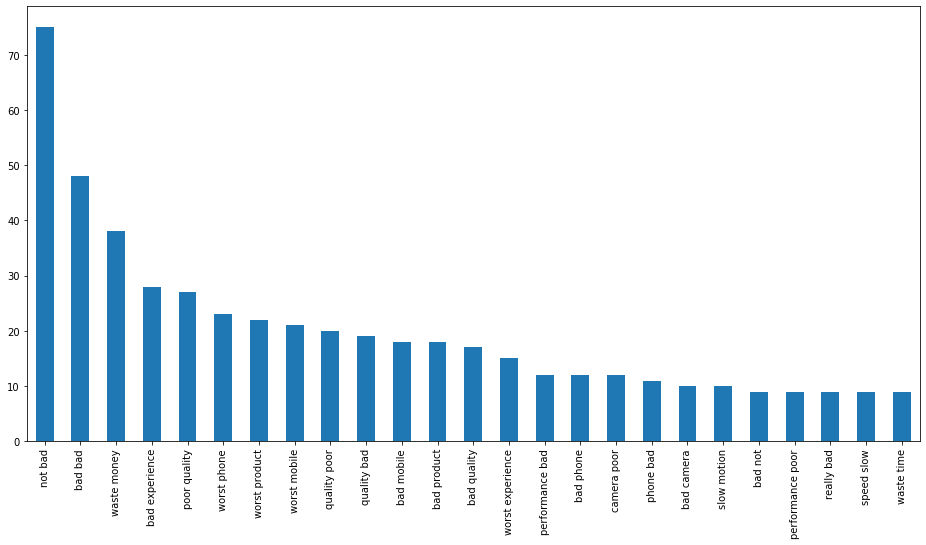

In [186]:
top_25_cutomer_concern_areas.plot(kind = 'bar', figsize = (16,8))